In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

## Which of $k$ chip brands sold at a convenience store are "the best"?

Let $\mathbf x^{(t)}$ be a length $k$ vector counting the number of each kind of chip brand purchased by time $t$ (relative to some start time) on a given day. Assume $\mathbf x$ follows the ***multinomial distribution*** (with $t$ omitted for brevity)

$$p(\mathbf x | \mathbf p) = {\displaystyle {\frac {n!}{x_{1}!\cdots x_{k}!}}p_{1}^{x_{1}}\cdots p_{k}^{x_{k}}}$$

> A ***multinomial distribution*** generalizes the ***binary outcome*** of the ***binomial distribution*** to a ***categorical outcome***. So, a ***multinomial random variable*** also consists of $n$ "trials", but now there are $k$ possible outcomes as opposed to two ("success" or "failure"), and the observed nubmer of each of these outcomes (out of $n$ "trials") are recorded in $\mathbf x$.
> - The ***multinomial distribution*** is parameterized by a "probability vector" $\mathbf p$ of length $k$ which satisfies $\sum_{j=1}^k p_j = 1$ (and $p_j \geq 0$ for all $j$) and where $p_j$ specifies the probabilities of the $j^{th}$ outcome of the $k$ categorical outcomes modeled by the ***multinomial distribution***.

The ***Dirichlet distribution*** has the form (again omitting $t$ for brevity)

$$f(\mathbf p | \boldsymbol\alpha) = \frac{1}{\mathrm{B}(\boldsymbol\alpha)} \prod_{j=1}^k p_j^{\alpha_j - 1} \quad E[p_j] = \frac{\alpha_j}{\sum_{j=1}^k \alpha_j} \quad \text{Var} [p_j]=\frac {E[p_j](1-E[p_j])}{1 + \sum_{j=1}^k \alpha_j} \quad \text{Cov}_{j\neq i}[p_j,p_i]=-\frac {E[p_j]E[p_i]}{1 + \sum_{j=1}^k \alpha_j}$$

and models a probability vector over a ***simplex***, meaning that $\sum_{j=1}^k p_j = 1$ (and $p_j \geq 0$ for all $j$).

> A ***Dirichlet distribution*** generalizes a ***beta distribution*** which models a "probability-valued" ***random variable*** which takes on values between $0$ and $1$. So, a ***Dirichlet random variable*** $\mathbf p$ is a vector of $k$ "probabilities" which sum to $1$.
> - The ***Dirichlet distribution*** is parameterized by the length $k$ vector $\boldsymbol\alpha$ where $\alpha_j>0$ for all $j$. As indicated by the expectation, variance, and covariance formulas above, the $\boldsymbol\alpha$ parameter vector controls the behavior of the actualizations of a ***Dirichlet random variable*** $\mathbf p$.  

In [3]:
# Example draw for n=10 from a Multinomial distribution
stats.multinomial(p=[0.2,0.5,0.2,0.1], n=10).rvs(size=1)[0]
# You can re-run the cell a few times to see example actualizations
# of this multinomial random variable, and note it's relationship to `n`

array([3, 4, 2, 1])

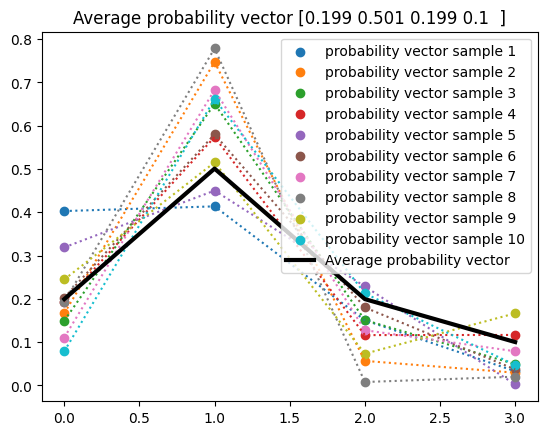

In [4]:
# Example draws from a Dirichlet distribution
plt.figure()
for i in range(10):
    p = stats.dirichlet(alpha=[2,5,2,1]).rvs(size=1)[0]; plt.plot(p, ':')
    plt.scatter(x=[0,1,2,3], y=p, label="probability vector sample "+str(i+1))

p = stats.dirichlet(alpha=[2,5,2,1]).rvs(size=100000).mean(axis=0)
plt.plot(p, 'k', linewidth=3, label="Average probability vector");
plt.title("Average probability vector "+str(p.round(3))); plt.legend();

1. [1/2 points] Using the "chips example", describe how the sequence $\mathbf x^{(t)}$ would generally behave over time $t$ assuing time $t=0$ is when the convenience store begins counting chip purchases.

Starting at time = 0 the counts will be very sparse as most of the counts will be close to 0 in the earlier times

When time increases to very large numbers the proportion from each chip brand over the sum of the others counts should converge to the actual parameter for the probability of selecting that chip brand as the "best". Additionally, for unlikely chip brands they should start observing counts when the t value is very large.

For example if 2 chips brands have probabilities [0.25, 0.75] there counts when t is  large could look something like this [253, 747] where 747/1000 is close to 0.75 and similarly for 253/1000 being close to 0.25.

2. [1/2 points] Specify the distribution $p(\mathbf p | \mathbf x^{(t)})$, your belief about the "best chips" at time $t$ according to a Bayesian analysis.


To specify the distribution \($ p(\mathbf{p} | \mathbf{x}^{(t)})$ \), representing our belief about the "best chips" at time \( t \) according to a Bayesian analysis, we utilize Bayes' theorem:

$p(\mathbf p | \mathbf x^{(t)}) = \frac{p(\mathbf{x}^{(t)} | \mathbf{p}) \cdot f(\mathbf{p} | \boldsymbol\alpha)}{p(\mathbf{x}^{(t)})}$
$\propto {\displaystyle {\frac {n!}{x_{1}!\cdots x_{t}!}}p_{1}^{x_{1}}\cdots p_{t}^{x_{t}}} \cdot \frac{1}{\mathrm{B}(\boldsymbol\alpha)} \prod_{j=1}^t p_j^{\alpha_j - 1} \quad$ \\
This distribution is a Dirichlet distribution with parameters:
$$\alpha = [\alpha_1 + x_1, ..., \alpha_t + x_t]$$

This can be seen by ignoring the constants and writing the multinomial description in product notation. Then we can simply mulitply corresponding p values


3. [1/2 point] Provide code which samples from $p(p_j|\mathbf x^{(t)}=[2,5,2,1])$ which is one of the marginal distributions of $p(\mathbf p | \mathbf x^{(t)}=[2,5,2,1])$.

- Hint 1: You do not have to analytically derive $p(p_j|\mathbf x^{(t)})$. You can sample from it just based on sampling from $p(\mathbf p | \mathbf x^{(t)})$.
- Hint 1: The $\alpha_j$ of the previous question now actually require chosen values. Use $1$ for each.

In [26]:
j=1

# Define the observed chip purchases
observed_purchases = np.array([2, 5, 2, 1])

# Define Dirichlet prior parameters
alpha_values = observed_purchases + 1 # let alpha = [1, 1, 1, 1]

# Sample from the posterior Dirichlet distribution
posterior_sample = stats.dirichlet(alpha=alpha_values).rvs(size=1)[0,j]
posterior_sample
# np.array([[2,5,2,1]])[0,j] # replace this with coding sampling from p_j|x

0.4378438646795534

4. [1/2 point] Provide code which estimates $\Pr(p_j>q|\mathbf x^{(t)}=[2,5,2,1])$ for some $q$ between $0$ and $1$.

In [36]:
# this can be done with for loops, or something like `...rvs(size=100000)[:,j]`
q = 0.4
j=1

# Define the observed chip purchases
observed_purchases = np.array([2, 5, 2, 1])

# Define Dirichlet prior parameters
alpha_values = observed_purchases + 1 # let alpha = [1, 1, 1, 1]
(stats.dirichlet(alpha=alpha_values).rvs(size=100000)[:,j] > q).mean()


0.57757

5. [1/2 point] Provide an interval quantifying your posterior uncertainty about the value of $p_j|\mathbf x^{(t)}=[2,5,2,1]$.




In [54]:
np.quantile(stats.dirichlet(alpha=alpha_values).rvs(size=100000)[:,j], [0.025, 0.975])

array([0.04963971, 0.45374958])

6. [1/2 point] Provide code which estimates $\Pr(p_j>p_{j'}|\mathbf x^{(t)}=[2,5,2,1])$ for $j\neq j'$.

In [42]:
j = 1
j_prime = 2

observed_purchases = np.array([2, 5, 2, 1])
alpha_values = observed_purchases + 1 # let alpha = [1, 1, 1, 1]
samples = stats.dirichlet(alpha=alpha_values).rvs(size=100000)
j_samples = samples[:,j]
j_prime_samples = samples[:, j_prime]
(j_samples > j_prime_samples).mean()

0.85552

7. [1/2 points] Provide python code to sample from the distribution of $p\left(\frac{p_j}{p_{j'}} | \mathbf x^{(t)} =[2,5,2,1] \right)$ and provide an interval estimate quantifying your belief about the value of $\frac{p_j}{p_{j'}}$.


In [46]:
j = 0
j_prime = 1

observed_purchases = np.array([2, 5, 2, 1])
alpha_values = observed_purchases + 1 # let alpha = [1, 1, 1, 1]
samples = stats.dirichlet(alpha=alpha_values).rvs(size=100000)
j_samples = samples[:,j]
j_prime_samples = samples[:, j_prime]

dist_samples = (j_samples/j_prime_samples)

np.quantile(dist_samples, [0.025, 0.975])

array([0.092803  , 1.85364331])

8. [1/2 points] Provide python code to sample from the distribution of $p\left(p_j - p_{j'} | \mathbf x^{(t)} =[2,5,2,1] \right)$ and provide an interval estimate quantifying your belief about the value of $p_j - p_{j'}$.

In [47]:
j = 0
j_prime = 1

observed_purchases = np.array([2, 5, 2, 1])
alpha_values = observed_purchases + 1 # let alpha = [1, 1, 1, 1]
samples = stats.dirichlet(alpha=alpha_values).rvs(size=100000)
j_samples = samples[:,j]
j_prime_samples = samples[:, j_prime]

dist_samples = (j_samples - j_prime_samples)

np.quantile(dist_samples, [0.025, 0.975])

array([-0.5852642 ,  0.19336019])

9. [1/2 points] If the actual true $\mathbf p = [p_1=0.397, p_2=0.4, p_3=0.2, p_4=0.002, p_5=0.001]$ why are both $p\left(\frac{p_j}{p_{j'}} | \mathbf x^{(t)}\right)$? and $p\left(p_j - p_{j'} | \mathbf x^{(t)} \right)$ relevant? What's different between these for $(j,j')=(2,3)$ as opposed to $(j,j')=(4,5)$?



Ratios and differences are used to gain insights on different things. A ratio looks to see the relative ratio between the values while the difference looks at the absolute difference.

First lets look at (2, 3) in this example there is a relatively large difference between the two probabilities. A difference of 20% comparatively for (4, 5) the difference is very small at 0.001. This small difference doesn't tell the full story though, since $p_4$ is still twice as likely as $p_5$ just like $p_2$ is to $p_3$. So when values are small we may be interested in looking at the ratio and when values are larger we may be interested in difference.

Had we just looked at difference we might not have noticed that p4 is twice as likely than p5. And similarly had we just looked at ratio we might not have noticed how "close" the two probabilities for p4 and p5 are.

10. [1/2 points] If the actual true $\mathbf p = [p_1=0.397, p_2=0.4, p_3=0.2, p_4=0.002, p_5=0.001]$ what should be true about $t$ if we are examining
$p\left(\frac{p_4}{p_{5}} | \mathbf x^{(t)}\right)$ or $p\left(p_4 - p_{5} | \mathbf x^{(t)} \right)$?

Hint: refer back to problem 1.


T should be a very large number. Since the probabilities for both of these chip brands being the best are very unlikely T must be very large for us to view any counts of them at all. If T isn't extremely large we might risk having both counts = 0 and providing no information about either.